In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [ ]:
y.value_counts()

,count
Diagnosis,
B,357
M,212


In [ ]:
X.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [ ]:
def print_class_percentages(y):
    print("Percentage of Benign: {}%".format(round(y.value_counts()[0] / len(y)*100 , 2)))
    print("Percentage of Malignant: {}%".format(round(y.value_counts()[1] / len(y)*100 , 2)))
print_class_percentages(y)

Percentage of Benign: 62.74%
Percentage of Malignant: 37.26%


<ipython-input-7-e80d3a4de69c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percentage of Benign: {}%".format(round(y.value_counts()[0] / len(y)*100 , 2)))
<ipython-input-7-e80d3a4de69c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percentage of Malignant: {}%".format(round(y.value_counts()[1] / len(y)*100 , 2)))


<ipython-input-8-b1af34d06a76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y, x="Diagnosis", palette=["#FF0000", "#008000"])


<Axes: xlabel='Diagnosis', ylabel='count'>

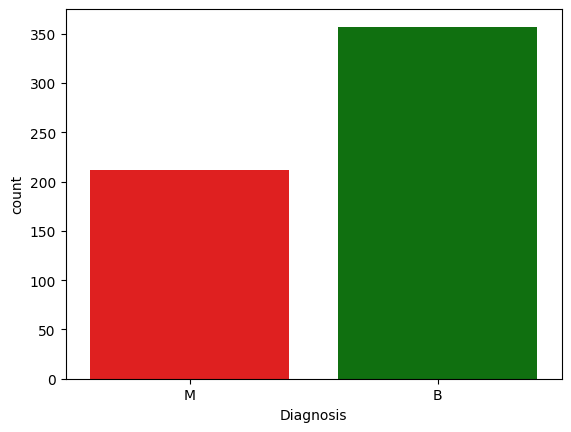

In [ ]:
import seaborn as sns

sns.countplot(y, x="Diagnosis", palette=["#FF0000", "#008000"])

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_os, y_os = smote.fit_resample(X, y)

In [ ]:
print_class_percentages(y_os)

Percentage of Benign: 50.0%
Percentage of Malignant: 50.0%


<ipython-input-7-e80d3a4de69c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percentage of Benign: {}%".format(round(y.value_counts()[0] / len(y)*100 , 2)))
<ipython-input-7-e80d3a4de69c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percentage of Malignant: {}%".format(round(y.value_counts()[1] / len(y)*100 , 2)))


<ipython-input-11-92b56a10f831>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_os, x='Diagnosis', palette=["#FF0000", "#008000"])


<Axes: xlabel='Diagnosis', ylabel='count'>

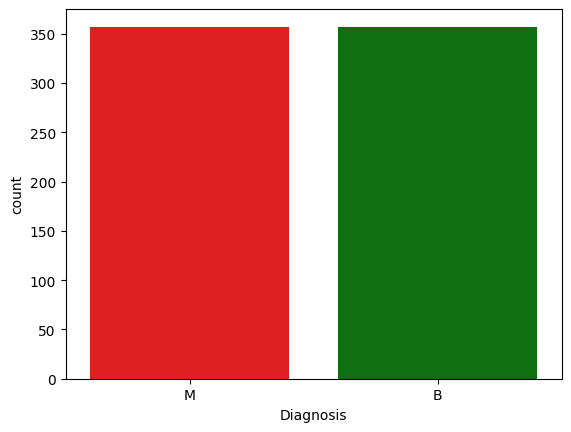

In [ ]:
sns.countplot(y_os, x='Diagnosis', palette=["#FF0000", "#008000"])

In [ ]:
import pandas as pd

new_df = pd.concat([X_os, y_os], axis=1)
new_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
new_df['Diagnosis'] = new_df['Diagnosis'].apply(lambda x: 1 if x=='M' else 0)
new_df['Diagnosis'].head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


#Feature scaling

In [ ]:
X = new_df.drop('Diagnosis', axis=1)
y = new_df['Diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

In [ ]:
X_train.std().values

array([3.69117992e+00, 4.21701506e+00, 2.55524184e+01, 3.75003745e+02,
       1.38911149e-02, 5.49422256e-02, 8.41248652e-02, 4.14524361e-02,
       2.67482497e-02, 6.73273440e-03, 2.84756983e-01, 5.12344123e-01,
       2.07627432e+00, 4.68587971e+01, 2.68666105e-03, 1.82256700e-02,
       2.99606387e-02, 6.06317367e-03, 8.64652964e-03, 2.49520700e-03,
       5.08135186e+00, 6.07995050e+00, 3.52753677e+01, 6.10576858e+02,
       2.28294235e-02, 1.65974176e-01, 2.17242179e-01, 6.78091050e-02,
       6.40873696e-02, 1.89956440e-02])

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

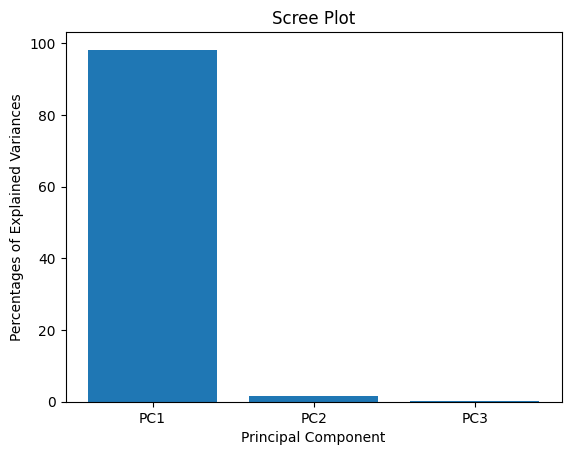

In [ ]:
pca_var_percentages = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(i) for i in range(1, len(pca_var_percentages)+1)]

plt.bar(x=range(1, 4), height=pca_var_percentages[:3], tick_label=labels[:3])
plt.xlabel('Principal Component')
plt.ylabel('Percentages of Explained Variances')
plt.title('Scree Plot')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

svc = SVC()
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC' : svc,
    'DecisionTree' : DecisionTreeClassifier(),
    'xgboost' : XGBClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, model in models.items():
    model.fit(X_train_reduced, y_train)
    training_score = cross_val_score(model, X_train_reduced, y_train, cv=5)
    print(key, "Has a training score :", round(training_score.mean(), 2)*100, "%")

LogisticRegression Has a training score : 92.0 %
SVC Has a training score : 90.0 %
DecisionTree Has a training score : 91.0 %
xgboost Has a training score : 93.0 %


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

#Logistic Regression Hyperparameter Tuning
log_reg_params = {'C' : [0.0005, 0.001,0.005, 0.01, 0.1], 'penalty' : ['l1', 'l2'],
                  'max_iter' : [100,500 ,1000, 5000, 10000]}
grid_log_reg = GridSearchCV(LogisticRegression(solver='saga'), log_reg_params,
                            cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_log_reg.fit(X_train_reduced, y_train)
log_reg = grid_log_reg.best_estimator_

#SVC hyperparameter Tuning
# svc_params = {'C' : [0.5, 0.7, 0.9, 1],
#               'kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
#               'gamma' : [0.01, 0.1, 1, 5]}
# grid_svc = GridSearchCV(SVC(), svc_params,
#                         cv=3, n_jobs=-1, scoring='accuracy')
# grid_svc.fit(X_train_reduced, y_train)
# svc = grid_svc.best_estimator_

# svc_params = {
#     'C' : uniform(0.1, 5),
#     'kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
#     'gamma': uniform(0.01, 1)
# }
# rand_svc = RandomizedSearchCV(SVC(), svc_params, n_iter=20, cv=3, random_state=42,
#                               n_jobs=-1, verbose=2, scoring='accuracy')
# rand_svc.fit(X_train_reduced, y_train)
# svc = rand_svc.best_estimator_

#Decision Tree
decision_tree_params = {"criterion": ["gini", "entropy"], 'max_depth' : list(range(2, 6, 1)),
                        'min_samples_leaf' : list(range(1, 7, 1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), decision_tree_params,
                         cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_tree.fit(X_train_reduced, y_train)
tree = grid_tree.best_estimator_

#XGBoost
xgb_params = {'eta' : np.arange(0.1, 1.1, 0.1).tolist(),
              'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth' : [4, 5, 6, 7],
              'lambda' : [0,0.05, 0.1, 0.5, 1,]
              }
grid_xgb = GridSearchCV(XGBClassifier(), xgb_params,
                        cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_xgb.fit(X_train_reduced, y_train)
xgb = grid_xgb.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 2100 candidates, totalling 10500 fits


In [ ]:
tuned_models = {
    'LogisticRegression': grid_log_reg,
    'DecisionTree' : grid_tree,
    'xgboost' : grid_xgb
}

for name, model in tuned_models.items():
    print(name, ' Best score : ', model.best_score_)
    print(name, ' Best parameters : ', model.best_params_)

tuned_models['SVC'] = svc

LogisticRegression  Best score :  0.8703890160183066
LogisticRegression  Best parameters :  {'C': 0.001, 'max_iter': 500, 'penalty': 'l2'}
DecisionTree  Best score :  0.9211594202898551
DecisionTree  Best parameters :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3}
xgboost  Best score :  0.9387185354691076
xgboost  Best parameters :  {'eta': 0.7000000000000001, 'gamma': 0.2, 'lambda': 0.05, 'max_depth': 6}


In [ ]:
def compare_models(models, tuned_models):
    print("\n--- Model Performance Comparison ---\n")

    # Iterating through each model and calculate cv before and after tuning
    for key, model in models.items():
        before_tuning = cross_val_score(model, X_train_reduced, y_train, cv=5, scoring='accuracy')
        after_tuning = cross_val_score(tuned_models[key], X_train_reduced, y_train, cv=5, scoring='accuracy')

        # Display model's score
        print(f"{key}:")
        print(f"   Before Tuning: {np.mean(before_tuning):.4f} ± {np.std(before_tuning):.4f}")
        print(f"   After Tuning : {np.mean(after_tuning):.4f} ± {np.std(after_tuning):.4f}")
        print(f"   Improvement  : {np.mean(after_tuning) - np.mean(before_tuning):.4f}")
        print("-" * 50)

In [ ]:
compare_models(models, tuned_models)


--- Model Performance Comparison ---

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression:
   Before Tuning: 0.9159 ± 0.0198
   After Tuning : 0.8651 ± 0.0092
   Improvement  : -0.0508
--------------------------------------------------
SVC:
   Before Tuning: 0.8984 ± 0.0144
   After Tuning : 0.8984 ± 0.0144
   Improvement  : 0.0000
--------------------------------------------------
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
DecisionTree:
   Before Tuning: 0.9019 ± 0.0291
   After Tuning : 0.9019 ± 0.0150
   Improvement  : 0.0000
--------------------------------------------------
Fitting 5 folds for each of 2100 candidates, totalling 10500 fits
Fitting 5 folds for each of 2100 candidates, totalling 10500 fits
Fitting 5 folds for each of 2100 candidates, totalling 10500 fits
Fitting 5 folds for 

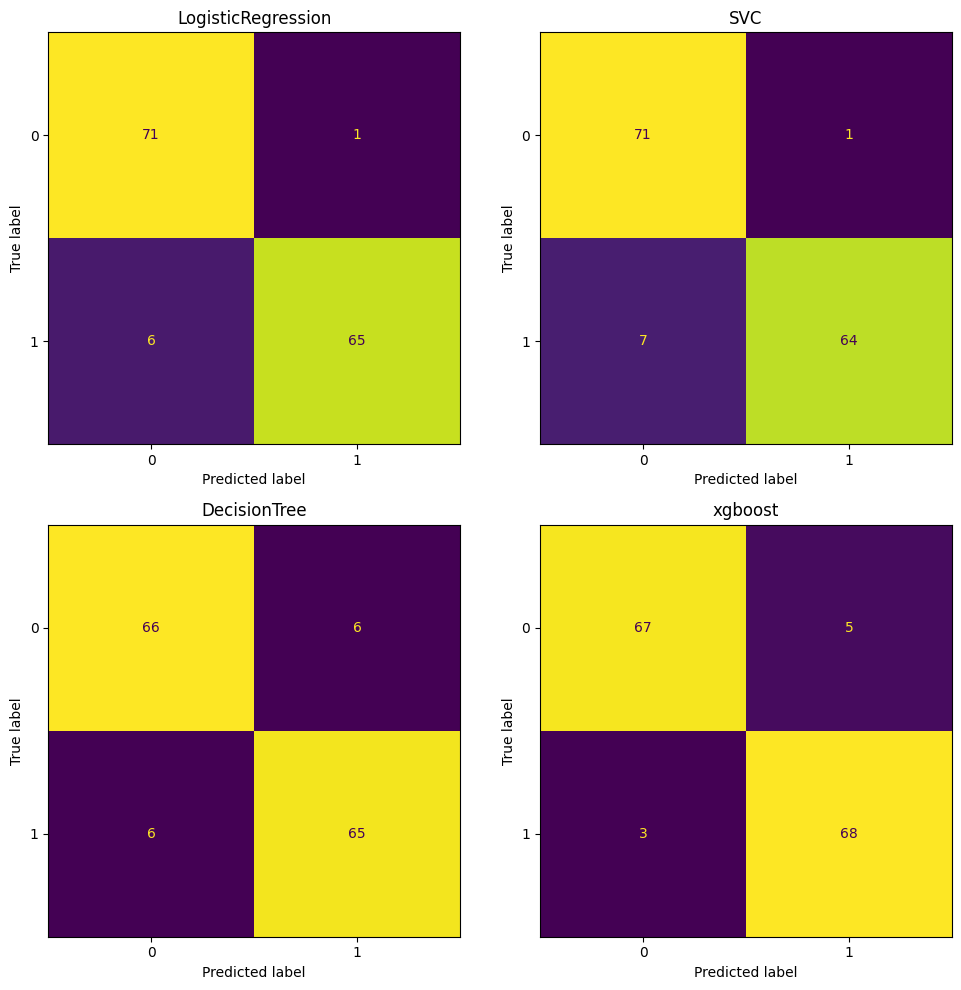

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrices = {}

for name, model in models.items():
    y_pred = model.predict(X_test_reduced)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

#plot Confusion Matrices
for idx, (name, cm) in enumerate(conf_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.unique(y))
    disp.plot(ax=axes[idx], colorbar=False)
    axes[idx].set_title(name)

plt.tight_layout()
plt.show()